In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

In [2]:
pwd

'C:\\Users\\vanes'

In [3]:
data = pd.read_csv(r'C:\Users\vanes\OneDrive\Dokumente\1. Semester\Data Science\Projekt\master.csv')

In [4]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [5]:
data.shape 

(31756, 12)

In [6]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [7]:
a = data[' gdp_for_year ($) ']
a.info()

<class 'pandas.core.series.Series'>
RangeIndex: 31756 entries, 0 to 31755
Series name:  gdp_for_year ($) 
Non-Null Count  Dtype 
--------------  ----- 
31756 non-null  object
dtypes: object(1)
memory usage: 248.2+ KB


In [8]:
dataclean = data.drop(columns = [' gdp_for_year ($) '])

<Axes: >

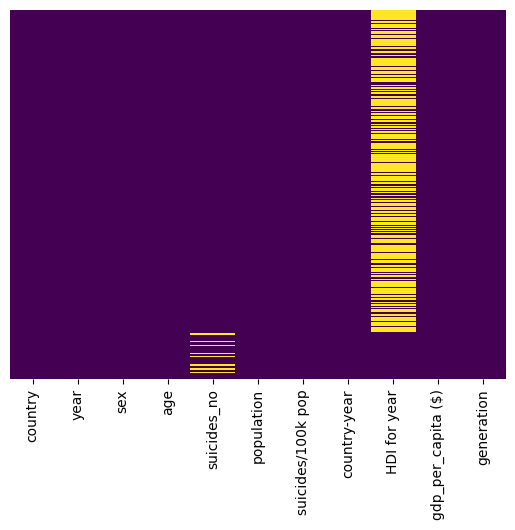

In [9]:
sns.heatmap(dataclean.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [10]:
print(dataclean.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
dtype: int64


In [11]:
dataclean = dataclean.drop(columns = ['HDI for year'])

In [12]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   gdp_per_capita ($)  31756 non-null  float64
 9   generation          31756 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.4+ MB


In [13]:
dataclean.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,126352.000000


In [14]:
datanummeric = dataclean.select_dtypes(include=['number'])
corr = datanummeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.013955,0.143894,-0.106052,0.307603
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.060721
population,0.143894,0.099528,1.000000,-0.049315,0.009165
suicides/100k pop,-0.106052,0.270322,-0.049315,1.000000,0.002596
gdp_per_capita ($),0.307603,0.060721,0.009165,0.002596,1.000000


In [15]:
print(dataclean.year.min())
print(dataclean.year.max())
print(type(dataclean.year.min()))

1985
2020
<class 'int'>


In [16]:
np.unique(dataclean['age'])

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [17]:
sum(dataclean.age == '15-24 years')

5298

In [55]:
print(dataclean(row = ['2']).age == '15-24 years')

TypeError: 'DataFrame' object is not callable

In [49]:
summe = 0
i = 0
for i in range (0, 31756, 1):
    if (dataclean[i].age == '15-24 years'):
        summe = summe + dataclean[i].suicides_no
print(summe)

KeyError: 0